In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading from csv

In [2]:
loc_data = pd.read_csv("directory.csv")

In [3]:
loc_data.head(10)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51
5,Starbucks,17688-182164,"Dalma Mall, Ground Floor",Licensed,"Dalma Mall, Mussafah",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.49,24.40
6,Starbucks,18182-182165,"Dalma Mall, Level 1",Licensed,"Dalma Mall, Mussafah",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.49,24.40
7,Starbucks,23359-229184,Debenhams Yas Mall,Licensed,Yas Island,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.61,24.46
8,Starbucks,30781-99022,Khalidiya Street,Licensed,Khalidiya St.,Abu Dhabi,AZ,AE,NaN,26670052,GMT+04:00 Asia/Muscat,55.69,24.19
9,Starbucks,20423-205465,Eastern Mangroves,Licensed,"Al Salam Street, The Mangroves",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48


## ----------------------------------------------------------------------------------------------------------------------------------

# Number of entries in data

In [4]:
loc_data.shape

(25600, 13)

## ----------------------------------------------------------------------------------------------------------------------------------

# Data Information

In [5]:
loc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 
 9   Phone Number    18739 non-null  object 
 10  Timezone        25600 non-null  object 
 11  Longitude       25599 non-null  float64
 12  Latitude        25599 non-null  float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


## ----------------------------------------------------------------------------------------------------------------------------------

# Columns in data

In [6]:
loc_data.columns

Index(['Brand', 'Store Number', 'Store Name', 'Ownership Type',
       'Street Address', 'City', 'State/Province', 'Country', 'Postcode',
       'Phone Number', 'Timezone', 'Longitude', 'Latitude'],
      dtype='object')

## ----------------------------------------------------------------------------------------------------------------------------------

# Distribution of brands

In [7]:
brands_dist = loc_data['Brand'].value_counts()
brands_dist

Starbucks                25249
Teavana                    348
Evolution Fresh              2
Coffee House Holdings        1
Name: Brand, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Brands Distribution')

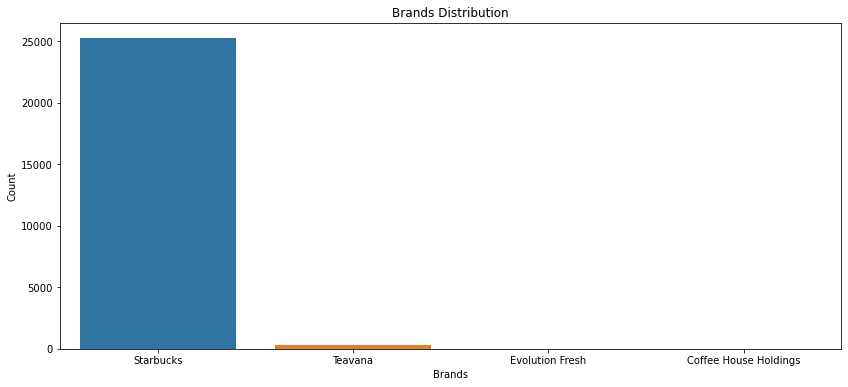

In [8]:
plt.figure(figsize=(14, 6))
fig = sns.barplot(brands_dist.index, brands_dist.values)
plt.xlabel("Brands")
plt.ylabel("Count")
plt.title("Brands Distribution")

## ----------------------------------------------------------------------------------------------------------------------------------

# Number of unique countries available in data

In [9]:
len(loc_data['Country'].unique())

73

## ----------------------------------------------------------------------------------------------------------------------------------

# Top 10 counties with maximmum number of coffee stores

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


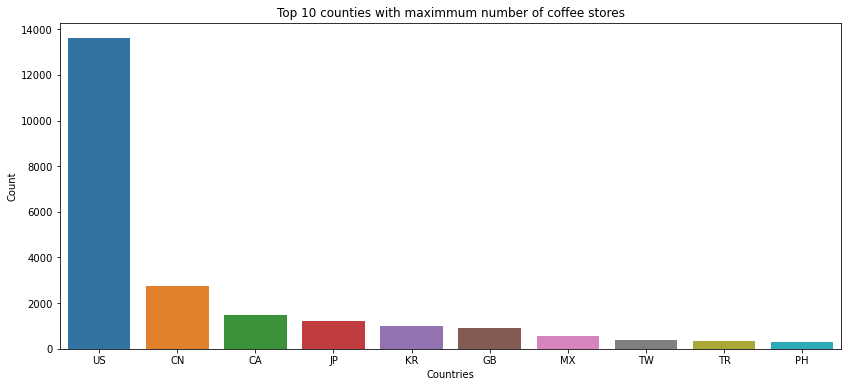

In [10]:
top10Countries = loc_data['Country'].value_counts().head(10)
plt.figure(figsize=(14,6))
fig = sns.barplot(top10Countries.index, top10Countries.values)
plt.xlabel("Countries")
plt.ylabel("Count")
plt.title("Top 10 counties with maximmum number of coffee stores")
plt.show()

In [11]:
top10Countries

US    13608
CN     2734
CA     1468
JP     1237
KR      993
GB      901
MX      579
TW      394
TR      326
PH      298
Name: Country, dtype: int64

## ----------------------------------------------------------------------------------------------------------------------------------

# US market

# Distribution of coffee stores in US

In [10]:
us = loc_data[loc_data["Country"] == "US"]

In [80]:
us.groupby("Brand")['Brand'].count()

Brand
Coffee House Holdings        1
Evolution Fresh              2
Starbucks                13311
Teavana                    294
Name: Brand, dtype: int64

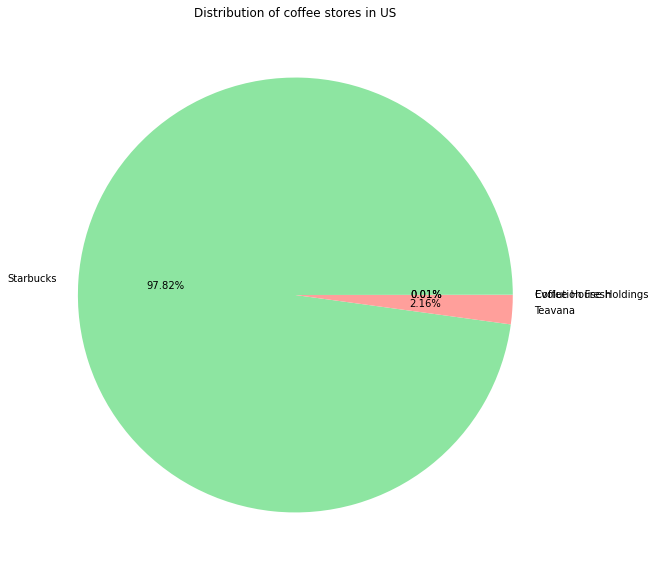

In [81]:
us_brands_dist = us.groupby("Brand")['Brand'].count()
plt.figure(figsize=(60,10))
colors = sns.color_palette('pastel')[0:5]
plt.pie(us_brands_dist.values, labels=us_brands_dist.index[0:4], colors=colors, autopct='%.2f%%')
plt.title("Distribution of coffee stores in US")
plt.show()

# Company owned Starbuck stores have strong market share in US (97.82%) compared to other ownership stores

## ----------------------------------------------------------------------------------------------------------------------------------

# Top 10 states in US with high numbers of Starbucks stores


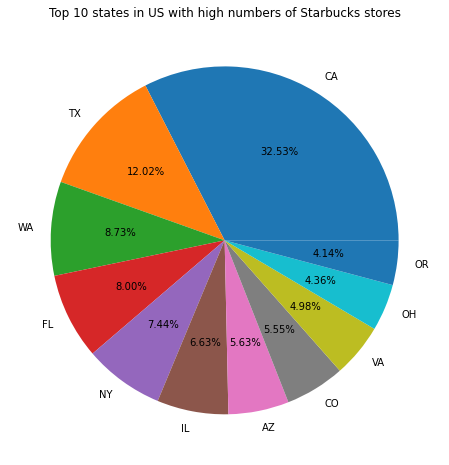

In [12]:
top_ten_state_us = loc_data[loc_data["Country"]=="US"].groupby("State/Province")['State/Province'].count().sort_values(ascending=False).to_frame()[0:11].loc[:,"State/Province"]
plt.figure(figsize=(12,8))
plt.pie(top_ten_state_us.values, labels=top_ten_state_us.index, autopct="%.2f%%")
plt.title("Top 10 states in US with high numbers of Starbucks stores")
plt.show()


In [13]:
top_ten_state_us


State/Province
CA    2821
TX    1042
WA     757
FL     694
NY     645
IL     575
AZ     488
CO     481
VA     432
OH     378
OR     359
Name: State/Province, dtype: int64

## California in USA has 32.53% of total number starbucks stores

## ----------------------------------------------------------------------------------------------------------------------------------

## Distribution of Ownership of stores in USA

In [14]:
loc_data.head(10)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51
5,Starbucks,17688-182164,"Dalma Mall, Ground Floor",Licensed,"Dalma Mall, Mussafah",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.49,24.40
6,Starbucks,18182-182165,"Dalma Mall, Level 1",Licensed,"Dalma Mall, Mussafah",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.49,24.40
7,Starbucks,23359-229184,Debenhams Yas Mall,Licensed,Yas Island,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.61,24.46
8,Starbucks,30781-99022,Khalidiya Street,Licensed,Khalidiya St.,Abu Dhabi,AZ,AE,NaN,26670052,GMT+04:00 Asia/Muscat,55.69,24.19
9,Starbucks,20423-205465,Eastern Mangroves,Licensed,"Al Salam Street, The Mangroves",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48


Text(0.5, 1.0, 'Ownership Distribution in USA')

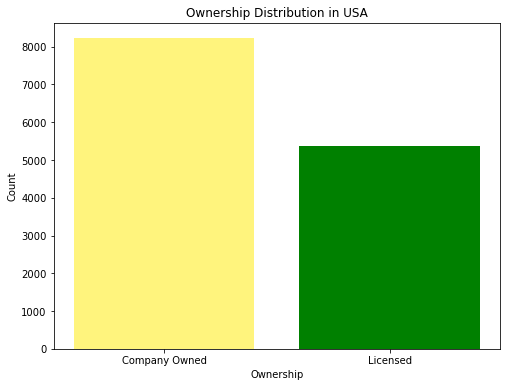

In [15]:
ownership_us = loc_data[loc_data['Country'] == "US"].groupby("Ownership Type")['Ownership Type'].count()
list(ownership_us.index[0:2])
plt.figure(figsize=(8,6))
plt.bar(list(ownership_us.index[0:2]), list(ownership_us.values[0:2]), color=["#FFF47D", "green"])
plt.xlabel("Ownership")
plt.ylabel("Count")
plt.title("Ownership Distribution in USA")

In [16]:
ownership_us

Ownership Type
Company Owned    8226
Licensed         5382
Name: Ownership Type, dtype: int64

## Company owned starbuck are more in number than licensed

## ----------------------------------------------------------------------------------------------------------------------------------

## Which ownership is more suited if new store is to be open in CA in USA?

In [16]:
loc_data.head(10)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51
5,Starbucks,17688-182164,"Dalma Mall, Ground Floor",Licensed,"Dalma Mall, Mussafah",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.49,24.40
6,Starbucks,18182-182165,"Dalma Mall, Level 1",Licensed,"Dalma Mall, Mussafah",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.49,24.40
7,Starbucks,23359-229184,Debenhams Yas Mall,Licensed,Yas Island,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.61,24.46
8,Starbucks,30781-99022,Khalidiya Street,Licensed,Khalidiya St.,Abu Dhabi,AZ,AE,NaN,26670052,GMT+04:00 Asia/Muscat,55.69,24.19
9,Starbucks,20423-205465,Eastern Mangroves,Licensed,"Al Salam Street, The Mangroves",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48


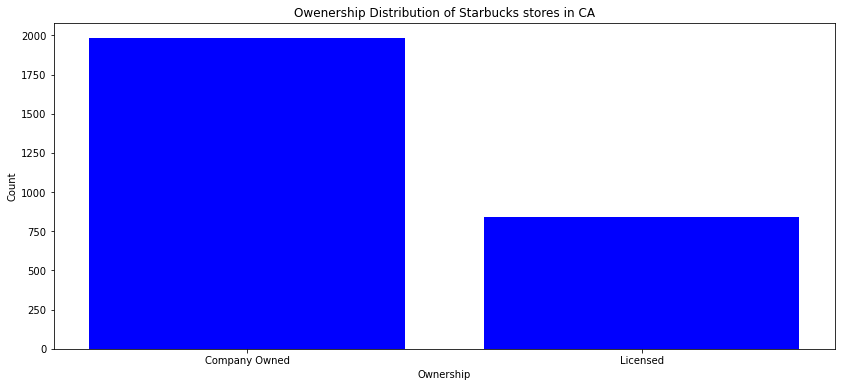

In [17]:
us_data_sb = loc_data[(loc_data["Country"] == "US")]
owenership_CA = us_data_sb[us_data_sb["State/Province"] == "CA"].groupby("Ownership Type")["Brand"].count()
plt.figure(figsize=(14,6))
plt.bar(owenership_CA.index, owenership_CA.values, color="blue")
plt.title("Owenership Distribution of Starbucks stores in CA")
plt.xlabel("Ownership")
plt.ylabel("Count")
plt.show()

In [19]:
owenership_CA

Ownership Type
Company Owned    1982
Licensed          839
Name: Brand, dtype: int64

## ----------------------------------------------------------------------------------------------------------------------------------

## Top 10 cities in USA with more starbuck stores

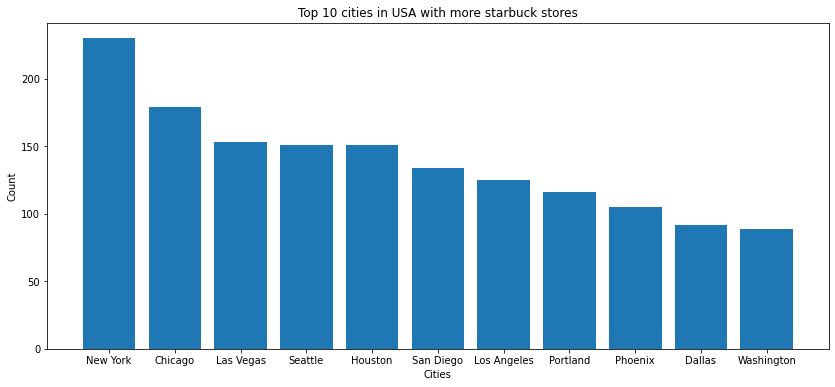

In [20]:
us_cities_top = loc_data[(loc_data["Country"] == "US") & (loc_data["Brand"] == "Starbucks")].groupby("City")["Brand"].count().sort_values(ascending=False)
us_cities_top
plt.figure(figsize=(14,6))
plt.bar(us_cities_top.index[0:11], us_cities_top.values[0:11])
plt.xlabel("Cities")
plt.ylabel("Count")
plt.title("Top 10 cities in USA with more starbuck stores")
plt.show()

In [22]:
us_cities_top.head(10)


City
New York       230
Chicago        179
Las Vegas      153
Seattle        151
Houston        151
San Diego      134
Los Angeles    125
Portland       116
Phoenix        105
Dallas          92
Name: Brand, dtype: int64

## Cities with high population density have more starbucks stores compared to citites with less population density

## -------------------------------------------------------------------------------------------------------------------------

## Top 10 cities in the world with more Number of starbucks stores

In [24]:
loc_data.head(5)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [23]:
top_cities_world = loc_data.groupby("City")['Brand'].count().sort_values(ascending=False)
idx_list = top_cities_world.index.to_list()

idx1 = idx_list.index("上海市")
idx2 = idx_list.index("北京市")
idx_list[idx1] = "Shanghai"
idx_list[idx2] = "Bejing"
top_cities_world.index = idx_list
top_cities_world.head(10)

Shanghai       542
Seoul          243
Bejing         234
New York       232
London         216
Toronto        192
Chicago        180
Mexico City    180
Seattle        156
Las Vegas      156
Name: Brand, dtype: int64

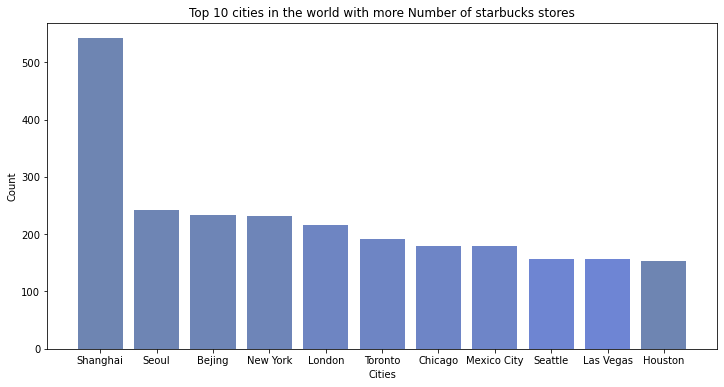

In [75]:
plt.figure(figsize=(12,6))
plt.bar(top_cities_world.index[0:11], top_cities_world.values[0:11], color=["#6E85B2", "#6E85B4", "#6E85B6", "#6E85B8", "#6E85C2", "#6E85C4", "#6E85C6", "#6E85C8", "#6E85D2", "#6E85D4"])
plt.xlabel("Cities")
plt.ylabel("Count")
plt.title("Top 10 cities in the world with more Number of starbucks stores")
plt.show()

## Shanghai from China has more number of starbucks stores in the world

## -------------------------------------------------------------------------------------------------------------------------

## Shanghai city Ownership distribution

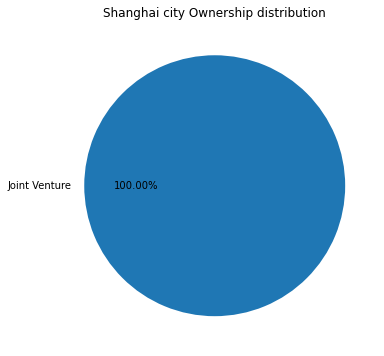

In [73]:
shanghai_ownership_dist = loc_data[loc_data['City'] == "上海市"].groupby("Ownership Type")["Brand"].count()
shanghai_ownership_dist
plt.figure(figsize=(14,6))
plt.pie(shanghai_ownership_dist.values, labels=shanghai_ownership_dist.index, autopct="%.2f%%")
plt.title("Shanghai city Ownership distribution")
plt.show()

## Shanghai's all starbucks stores are joint venture with local coffee stores